In [1]:
import pandas as pd
import numpy as np
import csv
import os
import sys
from math import floor
from matplotlib import pyplot as plt
import matplotlib
owd = os.getcwd()

In [2]:
p = pd.read_csv('test.csv')
cap_conv = p['cat_rho']*p['cat_H']*p['cat_eps']/p['bat_rho']/p['bat_H']/p['bat_eps']
cap_conv = cap_conv[0]

In [3]:
# Function definitions
def get_file_name(find_string, dir_path, **kwargs):
    flag = kwargs.get('flag', None)
    full_list = os.listdir(dir_path)
    if flag:
        file_name = [file for file in full_list if find_string in file]
    else:
        file_name = [file for file in full_list if find_string in file][0]
        
    return file_name

def df_name(file_name_list, file_number):
    file_name = file_name_list[file_number]
    df_name = file_name.split('_')
    return df_name[0]

def read_file(file_name_list):
    df_dict = {}
    for i in np.arange(0, len(file_name_list)):
        name = df_name(file_name_list, i)
        df_dict[name] = pd.read_csv(file_name_list[i])
    return df_dict

def sort_keys(keys):
    all_keys = list(keys)
    dch = 'dch'
    ch = 'ch'
    keys_dch = [key for key in all_keys if dch in key]
    keys_ch = [key for key in all_keys if key not in keys_dch]
    Crates = np.array([])
    for i in np.arange(0, len(keys_dch)):
        chars = [char for char in keys_dch[i]]
        for j in np.arange(0, len(chars)):
            if chars[j].isdigit() and j == 3:
                ints = chars[j]
            elif chars[j].isdigit() and j > 3:
                if ints == '0':
                    ints = ints + '.' + chars[j]
                else:
                    ints += chars[j]
        Crates = np.append(Crates, ints)
    return Crates, keys_dch, keys_ch

def sort_df(SV):
    Vcell = {}
    Capacity = {}
    keys = list(SV.keys())
    for i in np.arange(0, len(SV.keys())):
        Crate = keys[i]
        Vcell[Crate] = SV[Crate]['Phi_cat5']
        Capacity[Crate] = SV[Crate]['Time']*cap_conv
    return Vcell, Capacity

### Obtain file names for data files from subdirectories

In [4]:
# Obtain lists of file names for all .csv files in a folder
MHC_25um_norest = get_file_name('.csv', '25um_MHC_no_rest', flag=1)
Marcus_25um_norest = get_file_name('.csv', '25um_Marcus_no_rest', flag=1)
BV_25um_norest = get_file_name('.csv', '25um_BV_no_rest', flag=1)

# Obtain lists of file names for all .csv files in a folder
MHC_25um_rest = get_file_name('.csv', '25um_MHC_rest', flag=1)
Marcus_25um_rest = get_file_name('.csv', '25um_Marcus_rest', flag=1)
BV_25um_rest = get_file_name('.csv', '25um_BV_rest', flag=1)

### Read files from relevant subdirectories

In [5]:
# Loop over all file names in a list and read the csv files in as separate dataframes
#df_name(MHC_25um_no_rest, 0)
#path = os.getcwd() + '\MHC_25um_no_rest'
os.chdir(owd)
os.chdir('25um_MHC_no_rest')
MHC_25um_norest_dict = read_file(MHC_25um_norest)
os.chdir(owd)
os.chdir('25um_Marcus_no_rest')
Marcus_25um_norest_dict = read_file(Marcus_25um_norest)
os.chdir(owd)
os.chdir('25um_BV_no_rest')
BV_25um_norest_dict = read_file(BV_25um_norest)

os.chdir(owd)

os.chdir('25um_MHC_rest')
MHC_25um_rest_dict = read_file(MHC_25um_rest)
os.chdir(owd)
os.chdir('25um_Marcus_rest')
Marcus_25um_rest_dict = read_file(Marcus_25um_rest)
os.chdir(owd)
os.chdir('25um_BV_rest')
BV_25um_rest_dict = read_file(BV_25um_rest)

os.chdir(owd)

### Sort data for all MHC datasets

In [6]:
Vcell_MHC_25um_norest, Capacity_MHC_25um_norest = sort_df(MHC_25um_norest_dict)
Vcell_MHC_25um_rest, Capacity_MHC_25um_rest = sort_df(MHC_25um_rest_dict)

### Sort data for all Marcus datasets

In [7]:
Vcell_Marcus_25um_norest, Capacity_Marcus_25um_norest = sort_df(Marcus_25um_norest_dict)
Vcell_Marcus_25um_rest, Capacity_Marcus_25um_rest = sort_df(Marcus_25um_rest_dict)

### Sort data for all BV datasets

In [8]:
Vcell_BV_25um_norest, Capacity_BV_25um_norest = sort_df(BV_25um_norest_dict)
Vcell_BV_25um_rest, Capacity_BV_25um_rest = sort_df(BV_25um_rest_dict)

### Set generic plot formatting parameters that will be used by all (or most) plots

In [9]:
fs = 20
font = 'Times New Roman'
lw = 2.0
MHC_color = matplotlib.cm.plasma(0.1)
Marcus_color = matplotlib.cm.plasma(0.5)
BV_color = matplotlib.cm.plasma(0.9)
Crates, keys_dch, keys_ch = sort_keys(Marcus_25um_rest_dict.keys())
keys_dch = ['dch01C', 'dch1C', 'dch2C', 'dch5C', 'dch10C', 'dch20C']
keys_ch = ['ch01C', 'ch1C', 'ch2C', 'ch5C', 'ch10C', 'ch20C']

### This section is for C-rate comparison among kinetics without resting

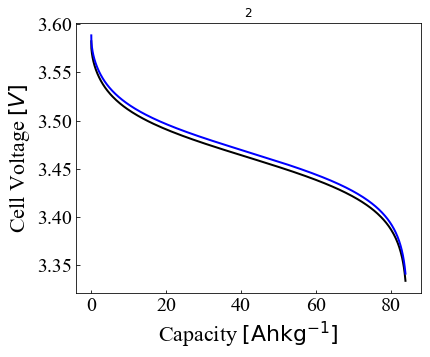

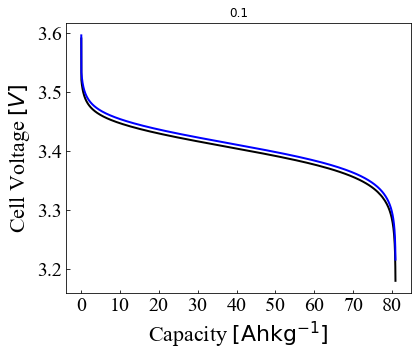

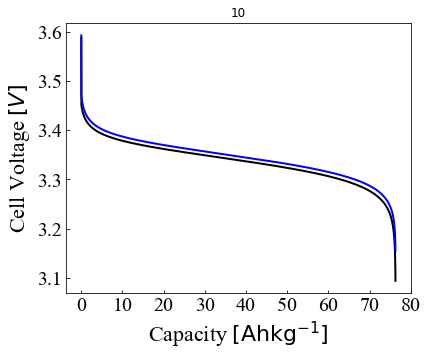

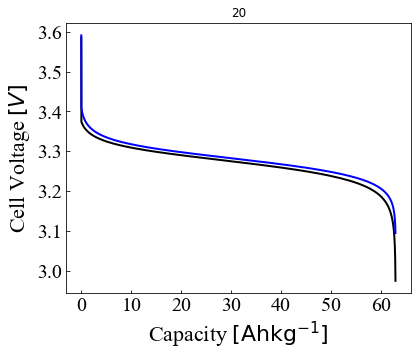

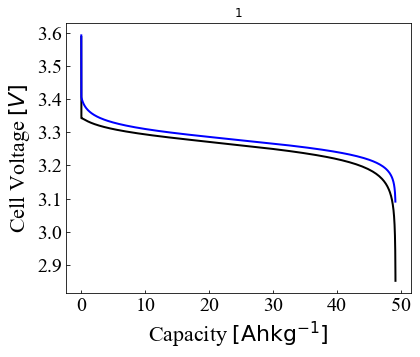

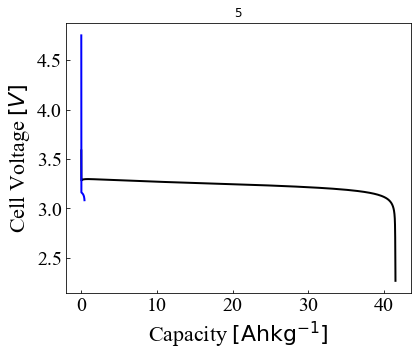

In [10]:
os.chdir(owd)
os.chdir('Figures/25um No rest figures')
for i in np.arange(0, len(keys_dch)):
    fig = plt.figure(i)
    ax = fig.add_axes([0.2,0.2,0.6,0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((8.,5.0))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')

    p1, = plt.plot(Capacity_MHC_25um_norest[keys_dch[i]], Vcell_MHC_25um_norest[keys_dch[i]],  
                   'k-', linewidth=lw)
    p2, = plt.plot(Capacity_Marcus_25um_norest[keys_dch[i]], Vcell_Marcus_25um_norest[keys_dch[i]],  
                   'b-', linewidth=lw)
    """p3, = plt.plot(Capacity_BV_25um_norest[keys_dch[i]], Vcell_BV_25um_norest[keys_dch[i]],  
                   'r-', linewidth=lw)"""

    #plt.xlim((0, 1775))
    #plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
    #plt.ylim((1.5, 2.8))
    #plt.legend(['1C', '0.1C', '0.02C'])
    #plt.yticks([])
    plt.title(Crates[i])
    plt.ylabel('Cell Voltage $[V]$',
               fontstyle='normal', fontname='Times New Roman', fontsize=fs+2, labelpad=5.0)
    plt.xlabel(r'Capacity $[\mathrm{A} \mathrm{h} \mathrm{kg}^{-1}]$', 
               fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
    fig.savefig('25um_norest' + keys_dch[i] + '.png')
os.chdir(owd)

### This section is for C-rate comparison among kinetics with resting

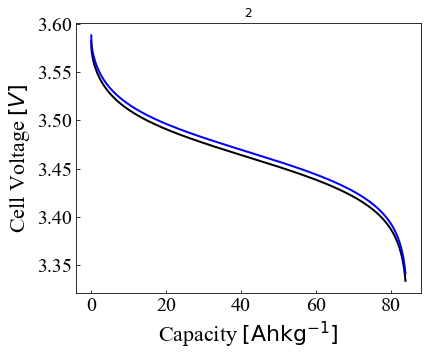

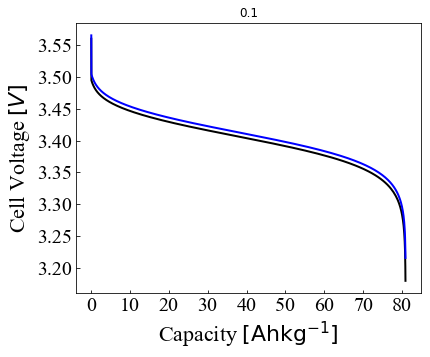

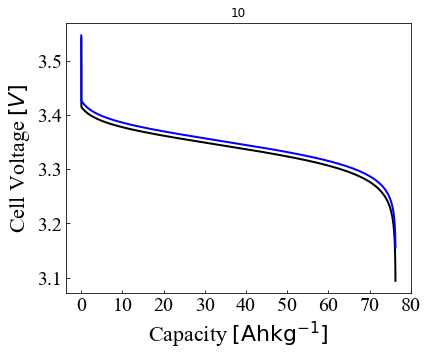

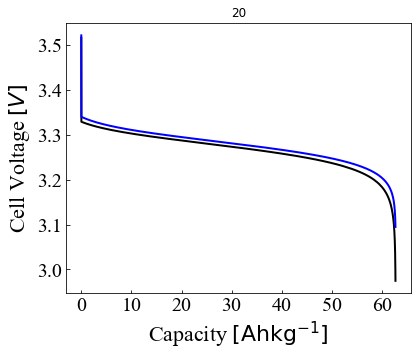

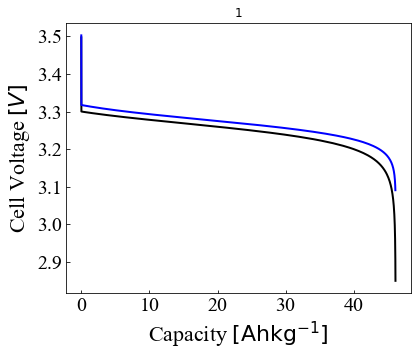

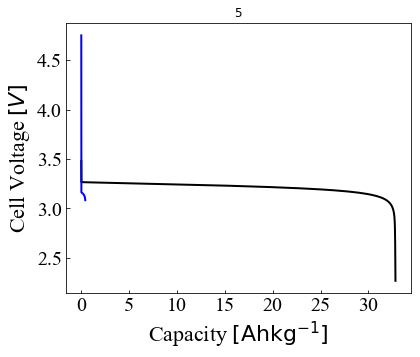

In [11]:
os.chdir(owd)
os.chdir('Figures/25um Rest figures')
for i in np.arange(0, len(keys_dch)):
    fig = plt.figure(i)
    ax = fig.add_axes([0.2,0.2,0.6,0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((8.,5.0))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')

    p1, = plt.plot(Capacity_MHC_25um_rest[keys_dch[i]], Vcell_MHC_25um_rest[keys_dch[i]],  
                   'k-', linewidth=lw)
    p2, = plt.plot(Capacity_Marcus_25um_rest[keys_dch[i]], Vcell_Marcus_25um_rest[keys_dch[i]],  
                   'b-', linewidth=lw)
    """p3, = plt.plot(Capacity_BV_25um_rest[keys_dch[i]], Vcell_BV_25um_rest[keys_dch[i]],  
                   'r-', linewidth=lw)"""

    #plt.xlim((0, 1775))
    #plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
    #plt.ylim((1.5, 2.8))
    #plt.legend(['1C', '0.1C', '0.02C'])
    #plt.yticks([])
    plt.title(Crates[i])
    plt.ylabel('Cell Voltage $[V]$',
               fontstyle='normal', fontname='Times New Roman', fontsize=fs+2, labelpad=5.0)
    plt.xlabel(r'Capacity $[\mathrm{A} \mathrm{h} \mathrm{kg}^{-1}]$', 
               fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
    fig.savefig('25um_rest' + keys_dch[i] + '.png')
os.chdir(owd)

### This section is for bar plots comparing discharge capacity and coulombic efficiency of the different kinetics methods at different C-rates no resting

In [12]:
def dch_cap_eta(keys_dch, keys_ch, capacity):
    cap_dch = {}
    cap_ch = {}
    eta_c = {}
    for i in np.arange(0, len(keys_dch)):
        cap_dch[keys_dch[i]] = capacity[keys_dch[i]][len(capacity[keys_dch[i]])-1]
        cap_ch[keys_ch[i]] = capacity[keys_ch[i]][len(capacity[keys_ch[i]])-1]
        if cap_ch[keys_ch[i]] < 10:
            eta_c[keys_dch[i]] = 0
        else:
            eta_c[keys_dch[i]] = 100*cap_dch[keys_dch[i]]/cap_ch[keys_ch[i]]
    return cap_dch, cap_ch, eta_c

cap_dch_MHC, cap_ch_MHC, coulombic_MHC = dch_cap_eta(keys_dch, keys_ch, 
                                                     Capacity_MHC_25um_norest)
cap_dch_Marcus, cap_ch_Marcus, coulombic_Marcus = dch_cap_eta(keys_dch, keys_ch, 
                                                     Capacity_Marcus_25um_norest)

cap_dch_BV = {}
cap_ch_BV = {}
coulombic_BV = {}
for i in np.arange(0, len(keys_dch)):
    if i > 0:
        cap_dch_BV[keys_dch[i]] = Capacity_BV_25um_norest[keys_dch[i]][len(Capacity_BV_25um_norest[keys_dch[i]])-1]
        cap_ch_BV[keys_ch[i]] = Capacity_BV_25um_norest[keys_ch[i]][len(Capacity_BV_25um_norest[keys_ch[i]])-1]
        if cap_ch_BV[keys_ch[i]] < 10:
            coulombic_BV[keys_dch[i]] = 0
        else:
            coulombic_BV[keys_dch[i]] = 100*cap_dch_BV[keys_dch[i]]/cap_ch_MHC[keys_ch[i]]

def eta_rt(keys_dch, keys_ch, Vcell, Capacity, flag):
    E_st = np.zeros([len(keys_ch)])
    E_rec = np.zeros([len(keys_dch)])
    for i in np.arange(flag, len(keys_ch)):
        for j in np.arange(1, len(Capacity[keys_ch[i]])):
            V_k = Vcell[keys_ch[i]][j]
            V_k_m = Vcell[keys_ch[i]][j-1]
            Cap_k = Capacity[keys_ch[i]][j]
            Cap_k_m = Capacity[keys_ch[i]][j-1]
            E_st[i] = E_st[i] + 0.5*(V_k + V_k_m)*(Cap_k - Cap_k_m)
            
    for i in np.arange(flag, len(keys_dch)):
        for j in np.arange(1, len(Capacity[keys_dch[i]])):
            V_k = Vcell[keys_dch[i]][j]
            V_k_m = Vcell[keys_dch[i]][j-1]
            Cap_k = Capacity[keys_dch[i]][j]
            Cap_k_m = Capacity[keys_dch[i]][j-1]
            E_rec[i] = E_rec[i] + 0.5*(V_k + V_k_m)*(Cap_k - Cap_k_m)
            
    if flag == 1:
        E_st[0] = 1
    
    Eta = np.round(100*E_rec/E_st, 1)
    for i in np.arange(0, len(Eta)):
        if Eta[i] > 100:
            Eta[i] = 0
    return Eta

Eta_MHC = eta_rt(keys_dch, keys_ch, Vcell_MHC_25um_norest, Capacity_MHC_25um_norest, 0)
Eta_Marcus = eta_rt(keys_dch, keys_ch, Vcell_Marcus_25um_norest, Capacity_Marcus_25um_norest, 0)
Eta_BV = eta_rt(keys_dch, keys_ch, Vcell_BV_25um_norest, Capacity_BV_25um_norest, 1)

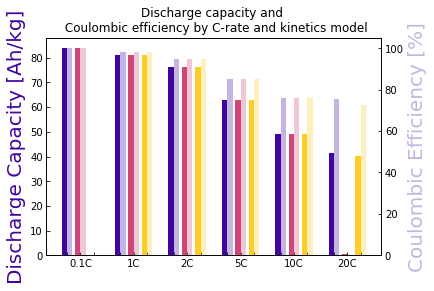

In [13]:
os.chdir(owd)
os.chdir('Figures/25um No rest figures')
rate_labels = ['','0.1C','','','1C','','','2C','','','5C','','','10C','','','20C','']
x = np.array([])
for i in np.arange(0, len(keys_dch)):
    offset = 4*i
    loc = np.arange(0+offset, 3+offset)
    x = np.append(x, loc)
bar_w = 0.4
cap_dch_MHC_v = [cap_dch_MHC[keys_dch[i]] for i in np.arange(0, len(keys_dch))]
cap_dch_Marcus_v = [cap_dch_Marcus[keys_dch[i]] for i in np.arange(0, len(keys_dch))]
cap_dch_BV_v = [cap_dch_BV[keys_dch[i]] for i in np.arange(1, len(keys_dch))]
cap_dch_BV_v.insert(0,0)

coulombic_MHC_v = [coulombic_MHC[keys_dch[i]] for i in np.arange(0, len(keys_dch))]
coulombic_Marcus_v = [coulombic_Marcus[keys_dch[i]] for i in np.arange(0, len(keys_dch))]
coulombic_BV_v = [coulombic_BV[keys_dch[i]] for i in np.arange(1, len(keys_dch))]
coulombic_BV_v.insert(0,0)

fig, ax = plt.subplots()
cap1 = ax.bar(x[::3] - bar_w/2, cap_dch_MHC_v, bar_w, label='Capacity', color=MHC_color)
cap2 = ax.bar(x[1::3] - bar_w/2, cap_dch_Marcus_v, bar_w, label='Capacity', color=Marcus_color)
cap3 = ax.bar(x[2::3] - bar_w/2, cap_dch_BV_v, bar_w, label='Capacity', color=BV_color)

ax.set_ylabel('Discharge Capacity [Ah/kg]', fontsize=fs, color=MHC_color)
ax.set_title('Discharge capacity and \n Coulombic efficiency by C-rate and kinetics model')
ax.set_xticks(x)
ax.tick_params(direction='in')
ax.set_xticklabels(rate_labels)
#ax.legend(['MHC', 'Marcus', 'BV'])

ax2 = ax.twinx()
coulombic1 = ax2.bar(x[::3] + bar_w/2, coulombic_MHC_v, bar_w, label='Efficiency', color=MHC_color, alpha=0.3)
coulombic2 = ax2.bar(x[1::3] + bar_w/2, coulombic_Marcus_v, bar_w, label='Efficiency', color=Marcus_color, alpha=0.3)
coulombic3 = ax2.bar(x[2::3] + bar_w/2, coulombic_BV_v, bar_w, label='Efficiency', color=BV_color, alpha=0.3)

ax2.set_ylabel('Coulombic Efficiency [%]', fontsize=fs, color=MHC_color, alpha=0.3)
ax2.set_xticklabels(rate_labels)
ax2.tick_params(direction='in')

fig.savefig('25um_norest_dch_cap_and_eff.png')

os.chdir(owd)

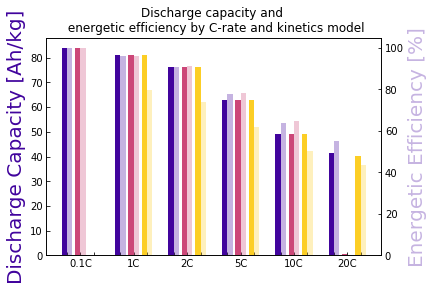

In [14]:
os.chdir(owd)
os.chdir('Figures/25um No rest figures')
rate_labels = ['','0.1C','','','1C','','','2C','','','5C','','','10C','','','20C','']
x = np.array([])
for i in np.arange(0, len(keys_dch)):
    offset = 4*i
    loc = np.arange(0+offset, 3+offset)
    x = np.append(x, loc)
bar_w = 0.4
cap_dch_MHC_v = [cap_dch_MHC[keys_dch[i]] for i in np.arange(0, len(keys_dch))]
cap_dch_Marcus_v = [cap_dch_Marcus[keys_dch[i]] for i in np.arange(0, len(keys_dch))]
cap_dch_BV_v = [cap_dch_BV[keys_dch[i]] for i in np.arange(1, len(keys_dch))]
cap_dch_BV_v.insert(0,0)

Eta_MHC_v = [Eta_MHC[i] for i in np.arange(0, len(keys_dch))]
Eta_Marcus_v = [Eta_Marcus[i] for i in np.arange(0, len(keys_dch))]
Eta_BV_v = [Eta_BV[i] for i in np.arange(1, len(keys_dch))]
Eta_BV_v.insert(0,0)
#cap_color = matplotlib.cm.plasma(0.1)
#eff_color = matplotlib.cm.plasma(0.9)
MHC_color = matplotlib.cm.plasma(0.1)
Marcus_color = matplotlib.cm.plasma(0.5)
BV_color = matplotlib.cm.plasma(0.9)
#cap_color = colors(0.2)
fig, ax = plt.subplots()
cap1 = ax.bar(x[::3] - bar_w/2, cap_dch_MHC_v, bar_w, label='Capacity', color=MHC_color)
cap2 = ax.bar(x[1::3] - bar_w/2, cap_dch_Marcus_v, bar_w, label='Capacity', color=Marcus_color)
cap3 = ax.bar(x[2::3] - bar_w/2, cap_dch_BV_v, bar_w, label='Capacity', color=BV_color)

ax.set_ylabel('Discharge Capacity [Ah/kg]', fontsize=fs, color=MHC_color)
ax.set_title('Discharge capacity and \n energetic efficiency by C-rate and kinetics model')
ax.set_xticks(x)
ax.tick_params(direction='in')
ax.set_xticklabels(rate_labels)
#ax.legend(['MHC', 'Marcus', 'BV'])

ax2 = ax.twinx()
coulombic1 = ax2.bar(x[::3] + bar_w/2, Eta_MHC_v, bar_w, label='Efficiency', color=MHC_color, alpha=0.3)
coulombic2 = ax2.bar(x[1::3] + bar_w/2, Eta_Marcus_v, bar_w, label='Efficiency', color=Marcus_color, alpha=0.3)
coulombic3 = ax2.bar(x[2::3] + bar_w/2, Eta_BV_v, bar_w, label='Efficiency', color=BV_color, alpha=0.3)

ax2.set_ylabel('Energetic Efficiency [%]', fontsize=fs, color=MHC_color, alpha=0.3)
ax2.set_xticklabels(rate_labels)
ax2.tick_params(direction='in')

fig.savefig('25um_norest_dch_cap_and_eta.png')

os.chdir(owd)